In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.decomposition import TruncatedSVD

# # Sample documents
# documents = [
#     "The cat sat on the mat",
#     "The dog chased the cat",
#     "The mat was on the floor"
# ]

# # Step 1: Compute TF-IDF Matrix
# tfidf_vectorizer = TfidfVectorizer(stop_words='english')
# tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# # Step 2: Apply Truncated SVD
# n_components = 2  # Reduce to 2 dimensions for visualization
# svd = TruncatedSVD(n_components=n_components, random_state=42)
# lsa_matrix = svd.fit_transform(tfidf_matrix)

# # Get terms and their contribution
# terms = tfidf_vectorizer.get_feature_names_out()
# term_contributions = svd.components_.T

# # Normalize contributions for visualization
# normalized_contributions = term_contributions / np.max(np.abs(term_contributions), axis=0)

# # Step 3: Create Word Bubble Graph
# fig, ax = plt.subplots(figsize=(10, 8))

# for i, term in enumerate(terms):
#     x = normalized_contributions[i, 0]
#     y = normalized_contributions[i, 1]
#     size = np.abs(x + y) * 1000  # Adjust size based on contribution magnitude
#     ax.scatter(x, y, s=size, alpha=0.6, label=term)
#     ax.text(x, y, term, fontsize=12, ha='center', va='center')

# ax.axhline(0, color='gray', linestyle='--', linewidth=0.5)
# ax.axvline(0, color='gray', linestyle='--', linewidth=0.5)
# ax.set_title("Word Bubble Vector Graph (LSI)")
# ax.set_xlabel("SVD Component 1")
# ax.set_ylabel("SVD Component 2")
# plt.grid(True)
# plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from PyPDF2 import PdfReader
import re

# Step 1: Read and Clean Text from PDFs
def read_pdf_and_clean(file_path):
    reader = PdfReader("./books/" + file_path)
    text = ""
    for page in reader.pages:
        text += page.extract_text() + " "
    # Clean the text: remove non-alphanumeric characters and extra spaces
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    return cleaned_text

# Example usage: list of PDF file paths
pdf_files = ["HeartofDarkness.pdf", "Pygmalion.pdf", "AliceinWonderland.pdf" , "lifeonthemississippi.pdf", "TheTimeMachine.pdf", "TheArtofWar.pdf", "Gulliver's_Travels.pdf", "Frankenstein.pdf", "APicklefortheKnowingOnes.pdf", "AChristmasCarolinProse.pdf"]
print(len(pdf_files))
documents = [read_pdf_and_clean(file) for file in pdf_files]

# Step 2: Compute TF-IDF Matrix
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Step 3: Apply Truncated SVD
n_components = 10  # Reduce to 2 dimensions for visualization
svd = TruncatedSVD(n_components=n_components, random_state=42)
lsa_matrix = svd.fit_transform(tfidf_matrix)

# Step 4: Compute Similarities
similarity_matrix = cosine_similarity(lsa_matrix)

# Display similarity matrix
print("Similarity Matrix:")
print(similarity_matrix)


10
Similarity Matrix:
[[1.         0.119907   0.23758986 0.51707102 0.44735692 0.1411302
  0.37760253 0.37832194 0.17789763 0.24035866]
 [0.119907   1.         0.06281242 0.12797905 0.08834285 0.03603114
  0.0911328  0.09193917 0.05285834 0.07032308]
 [0.23758986 0.06281242 1.         0.22999183 0.21112438 0.06367629
  0.18130334 0.15230722 0.06909228 0.15580754]
 [0.51707102 0.12797905 0.22999183 1.         0.44333687 0.19421003
  0.46553237 0.41621748 0.21800271 0.24765653]
 [0.44735692 0.08834285 0.21112438 0.44333687 1.         0.13459221
  0.3833858  0.37010492 0.14737276 0.22013926]
 [0.1411302  0.03603114 0.06367629 0.19421003 0.13459221 1.
  0.21227148 0.16605558 0.08383285 0.06444457]
 [0.37760253 0.0911328  0.18130334 0.46553237 0.3833858  0.21227148
  1.         0.44270679 0.20325964 0.19528348]
 [0.37832194 0.09193917 0.15230722 0.41621748 0.37010492 0.16605558
  0.44270679 1.         0.17035979 0.20434801]
 [0.17789763 0.05285834 0.06909228 0.21800271 0.14737276 0.08383285

In [3]:

# svd = TruncatedSVD(n_components=10, random_state=42)
# lsa_matrix = svd.fit_transform(tfidf_matrix)

In [25]:
tfidf_matrix.shape

(10, 28266)

In [4]:
lsa_matrix

array([[ 7.24329986e-01, -1.03331783e-01, -6.69349981e-02,
         9.95225178e-03, -1.29425576e-01, -9.26824388e-02,
        -3.69681138e-01, -3.23174255e-01, -2.12947608e-01,
        -3.85091978e-01],
       [ 2.12863961e-01, -4.21789053e-01,  8.68289826e-01,
        -1.39214554e-01, -2.58099363e-02, -1.05857864e-02,
         2.73215363e-02,  4.14980077e-02,  1.22006201e-02,
        -8.91052160e-03],
       [ 3.95329810e-01, -4.44112692e-01, -2.64199449e-01,
        -1.86341454e-01,  5.88993424e-01, -4.03990656e-01,
         1.73219864e-01,  3.30573191e-02, -2.62636737e-02,
         6.66184933e-03],
       [ 7.68496124e-01,  1.74681483e-02, -1.04339174e-02,
         9.33454210e-03, -9.44114289e-02, -6.00246336e-02,
        -1.50905211e-01, -3.21892865e-01,  8.94016213e-02,
         5.11875031e-01],
       [ 6.86968369e-01, -6.29226617e-02, -1.26789293e-01,
        -2.32560777e-02, -2.10753985e-01, -9.36772650e-02,
        -3.27578984e-01,  5.79620887e-01,  9.88755762e-02,
         3.

In [5]:
cumulative_variance = np.cumsum(svd.explained_variance_ratio_)


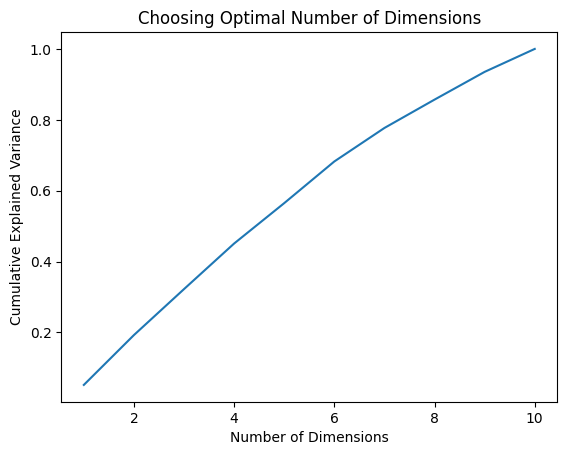

In [6]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Dimensions')
plt.ylabel('Cumulative Explained Variance')
plt.title('Choosing Optimal Number of Dimensions')
plt.show()


In [7]:
tfidf_matrix

<10x28266 sparse matrix of type '<class 'numpy.float64'>'
	with 59901 stored elements in Compressed Sparse Row format>

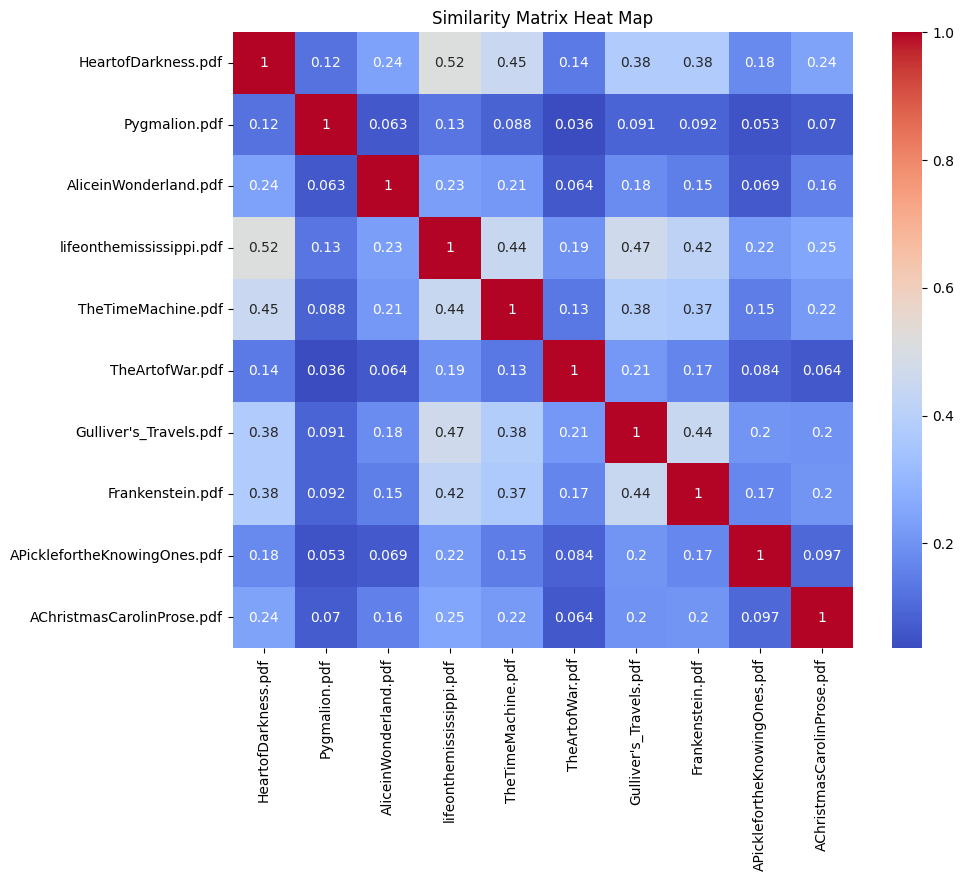

In [8]:
import seaborn as sns

# Plot the heat map for the similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', xticklabels=pdf_files, yticklabels=pdf_files)
plt.title('Similarity Matrix Heat Map')
plt.show()

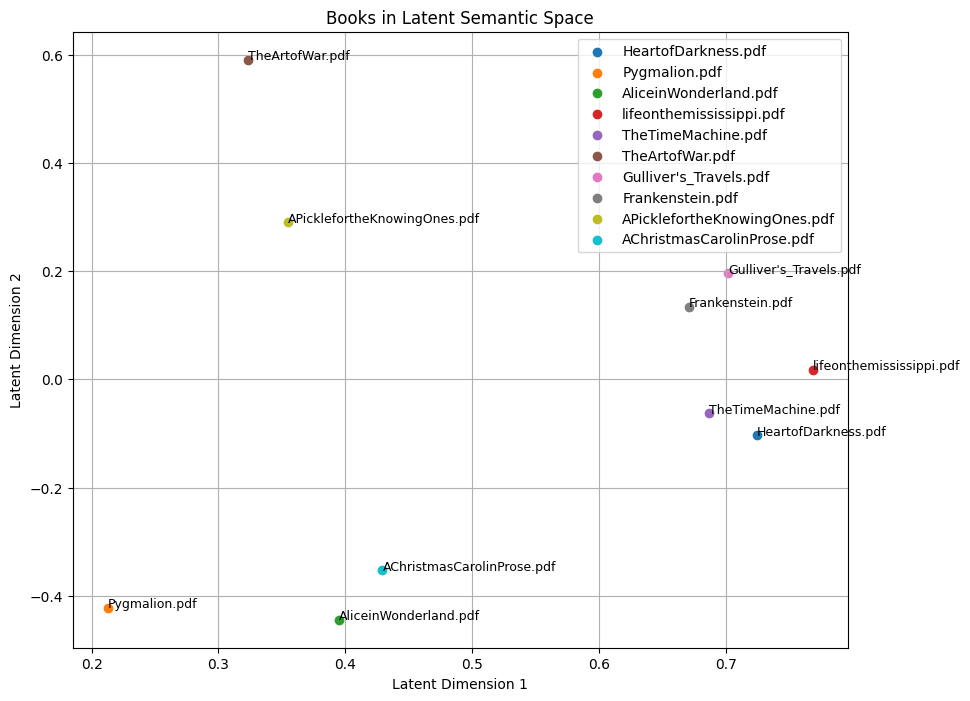

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for i, book in enumerate(pdf_files):
    plt.scatter(lsa_matrix[i, 0], lsa_matrix[i, 1], label=book)
    plt.text(lsa_matrix[i, 0], lsa_matrix[i, 1], book, fontsize=9)
plt.title("Books in Latent Semantic Space")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.grid(True)
plt.legend()
plt.show()


In [10]:
from sklearn.cluster import KMeans

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(lsa_matrix)

for i, book in enumerate(pdf_files):
    print(f"{book}: Cluster {labels[i]}")


HeartofDarkness.pdf: Cluster 0
Pygmalion.pdf: Cluster 2
AliceinWonderland.pdf: Cluster 0
lifeonthemississippi.pdf: Cluster 0
TheTimeMachine.pdf: Cluster 0
TheArtofWar.pdf: Cluster 0
Gulliver's_Travels.pdf: Cluster 0
Frankenstein.pdf: Cluster 0
APicklefortheKnowingOnes.pdf: Cluster 0
AChristmasCarolinProse.pdf: Cluster 1


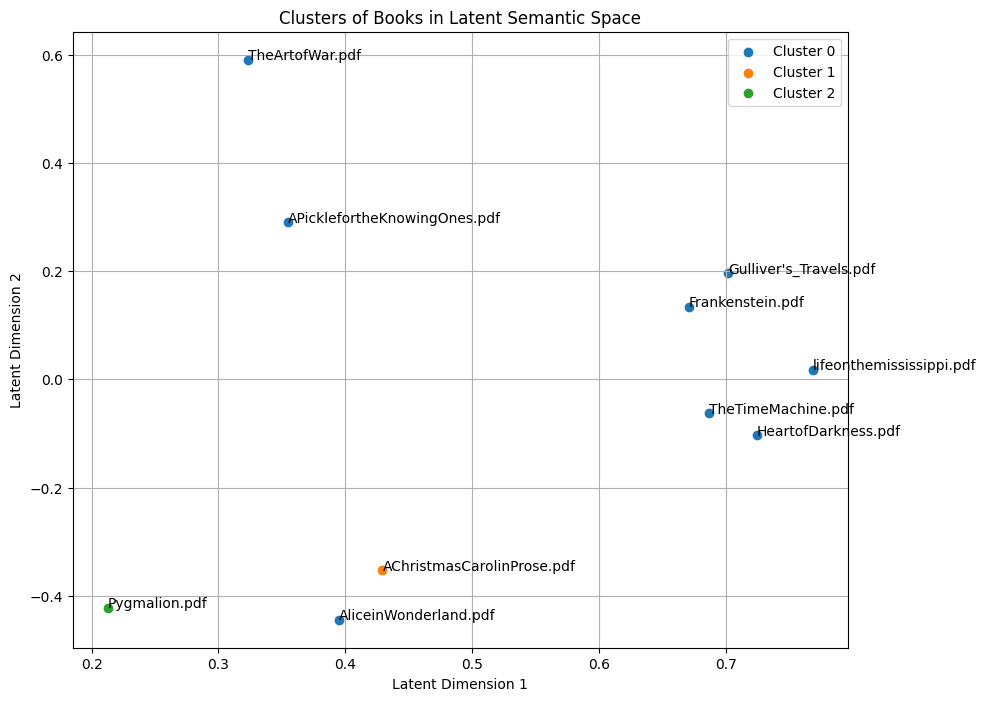

In [26]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    cluster_points = lsa_matrix[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
    
# Annotate the points with book names
for i, book in enumerate(pdf_files):
    plt.annotate(book, (lsa_matrix[i, 0], lsa_matrix[i, 1]))

plt.title("Clusters of Books in Latent Semantic Space")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
terms = tfidf_vectorizer.get_feature_names_out()
for i, book in enumerate(pdf_files):
    print(f"Top terms for {book}:")
    top_terms_indices = np.argsort(-np.abs(svd.components_[:, i]))[:10]
    for term_idx in top_terms_indices:
        print(f"  {terms[term_idx]}")


Top terms for HeartofDarkness.pdf:
  100
  100000
  1000000
  105000
  10
  10021060
  10000
  103842
  103
  10300
Top terms for Pygmalion.pdf:
  105000
  100
  100000
  10300
  103
  1000000
  10
  10000
  10021060
  103842
Top terms for AliceinWonderland.pdf:
  100000
  100
  1000000
  10021060
  103
  10000
  103842
  10
  10300
  105000
Top terms for lifeonthemississippi.pdf:
  100000
  100
  1000000
  10021060
  103
  10000
  103842
  10
  10300
  105000
Top terms for TheTimeMachine.pdf:
  105000
  10300
  10
  103
  103842
  1000000
  10021060
  100
  10000
  100000
Top terms for TheArtofWar.pdf:
  100000
  100
  1000000
  10021060
  103
  10000
  103842
  10
  10300
  105000
Top terms for Gulliver's_Travels.pdf:
  105000
  10300
  10
  103
  103842
  1000000
  10021060
  100
  10000
  100000
Top terms for Frankenstein.pdf:
  105000
  10300
  10
  103
  103842
  1000000
  10021060
  100
  10000
  100000
Top terms for APicklefortheKnowingOnes.pdf:
  100000
  100
  1000000
  10021

In [12]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=3, random_state=42)
nmf_matrix = nmf.fit_transform(tfidf_matrix)

for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic {topic_idx + 1}:")
    top_terms_indices = topic.argsort()[-10:][::-1]
    for term_idx in top_terms_indices:
        print(f"  {terms[term_idx]}")


Topic 1:
  time
  said
  man
  great
  like
  did
  little
  came
  kurtz
  saw
Topic 2:
  alice
  scrooge
  said
  little
  christmas
  like
  know
  turtle
  scrooges
  hatter
Topic 3:
  higgins
  pickering
  liza
  eliza
  mrs
  doolittle
  pearce
  girl
  freddy
  dont


In [13]:
query = "politics and war"
query_vector = tfidf_vectorizer.transform([query])
query_lsa = svd.transform(query_vector)
query_similarity = cosine_similarity(query_lsa, lsa_matrix)

for i, book in enumerate(pdf_files):
    print(f"Similarity of '{query}' with {book}: {query_similarity[0, i]:.4f}")


Similarity of 'politics and war' with HeartofDarkness.pdf: 0.0630
Similarity of 'politics and war' with Pygmalion.pdf: 0.0087
Similarity of 'politics and war' with AliceinWonderland.pdf: -0.0000
Similarity of 'politics and war' with lifeonthemississippi.pdf: 0.4200
Similarity of 'politics and war' with TheTimeMachine.pdf: 0.0384
Similarity of 'politics and war' with TheArtofWar.pdf: 0.8890
Similarity of 'politics and war' with Gulliver's_Travels.pdf: 0.3570
Similarity of 'politics and war' with Frankenstein.pdf: 0.0394
Similarity of 'politics and war' with APicklefortheKnowingOnes.pdf: 0.1458
Similarity of 'politics and war' with AChristmasCarolinProse.pdf: 0.0000


In [14]:
book1_idx, book2_idx = 0, 2  # Indices of books to compare
diff = lsa_matrix[book1_idx] - lsa_matrix[book2_idx]
print(f"Difference in latent semantics between {pdf_files[book1_idx]} and {pdf_files[book2_idx]}: {diff}")


Difference in latent semantics between HeartofDarkness.pdf and AliceinWonderland.pdf: [ 0.32900018  0.34078091  0.19726445  0.19629371 -0.718419    0.31130822
 -0.542901   -0.35623157 -0.18668393 -0.39175383]


In [15]:
term_correlation_matrix = cosine_similarity(svd.components_.T)
print("Term Correlation Matrix:")
print(term_correlation_matrix)


Term Correlation Matrix:
[[ 1.          0.84909848  0.90736268 ... -0.16925846  0.90736268
   0.90736268]
 [ 0.84909848  1.          0.59167112 ... -0.24058005  0.59167112
   0.59167112]
 [ 0.90736268  0.59167112  1.         ... -0.10903209  1.
   1.        ]
 ...
 [-0.16925846 -0.24058005 -0.10903209 ...  1.         -0.10903209
  -0.10903209]
 [ 0.90736268  0.59167112  1.         ... -0.10903209  1.
   1.        ]
 [ 0.90736268  0.59167112  1.         ... -0.10903209  1.
   1.        ]]


In [16]:
query = "comedy and humor"
query_vector = tfidf_vectorizer.transform([query])
query_lsa = svd.transform(query_vector)
query_similarity = cosine_similarity(query_lsa, lsa_matrix)

for i, book in enumerate(pdf_files):
    print(f"Similarity of '{query}' with {book}: {query_similarity[0, i]:.4f}")


Similarity of 'comedy and humor' with HeartofDarkness.pdf: 0.0000
Similarity of 'comedy and humor' with Pygmalion.pdf: 0.1310
Similarity of 'comedy and humor' with AliceinWonderland.pdf: -0.0000
Similarity of 'comedy and humor' with lifeonthemississippi.pdf: 0.7398
Similarity of 'comedy and humor' with TheTimeMachine.pdf: -0.0000
Similarity of 'comedy and humor' with TheArtofWar.pdf: 0.3242
Similarity of 'comedy and humor' with Gulliver's_Travels.pdf: -0.0000
Similarity of 'comedy and humor' with Frankenstein.pdf: 0.0000
Similarity of 'comedy and humor' with APicklefortheKnowingOnes.pdf: 0.0000
Similarity of 'comedy and humor' with AChristmasCarolinProse.pdf: 0.0000


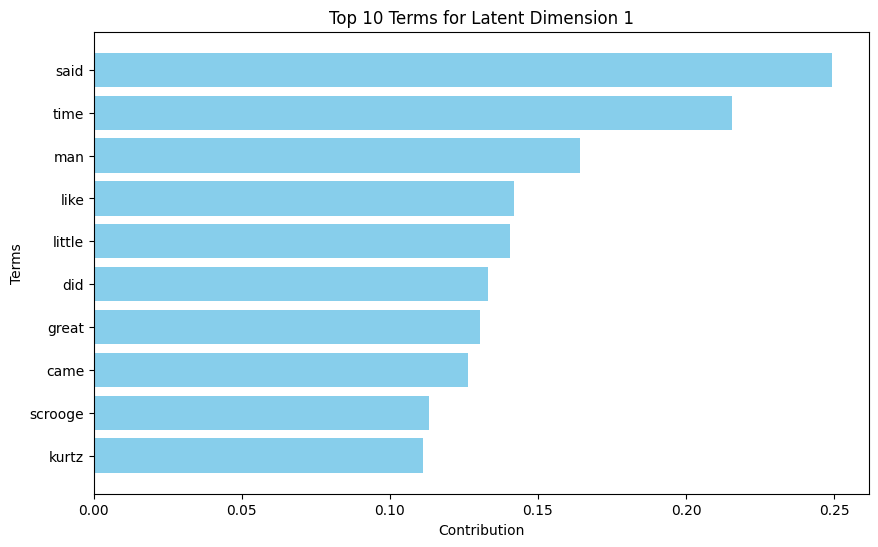

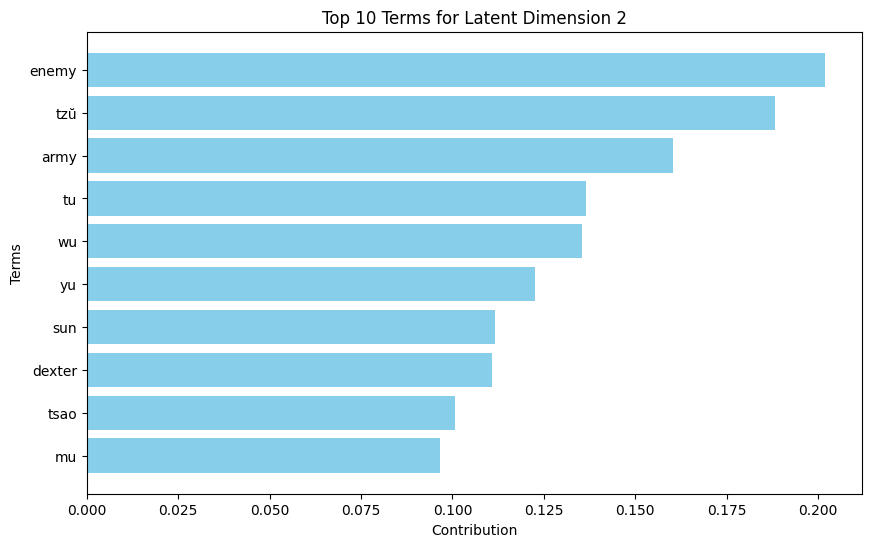

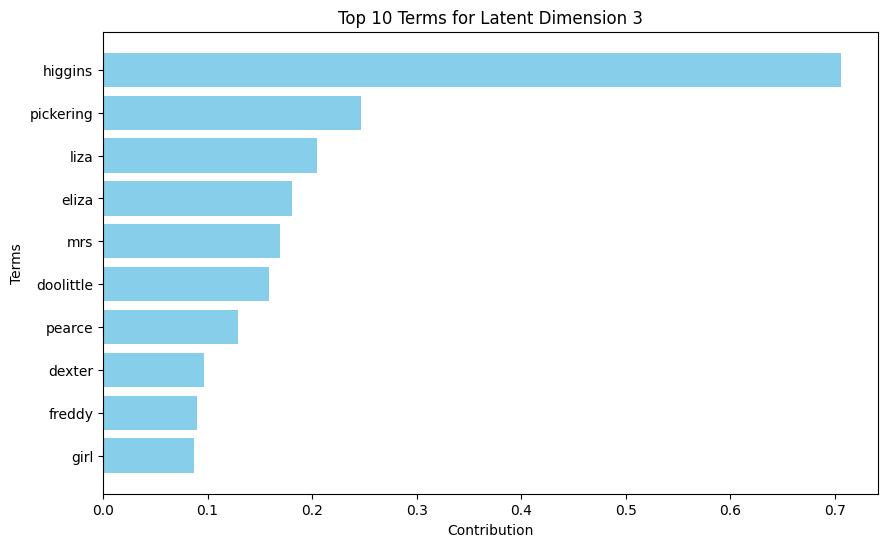

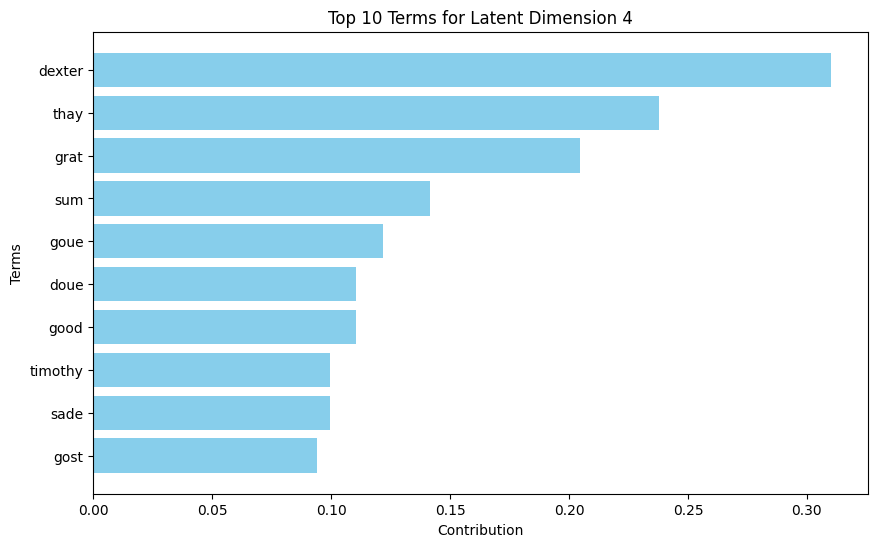

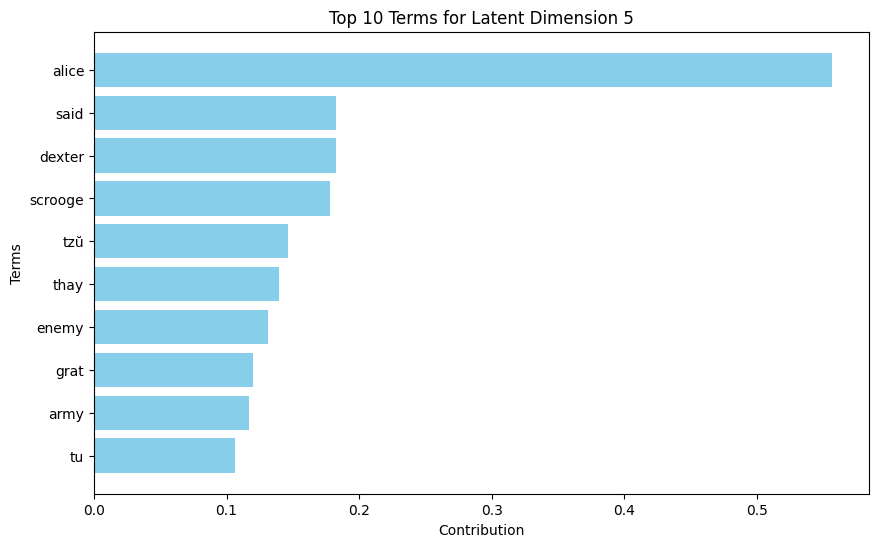

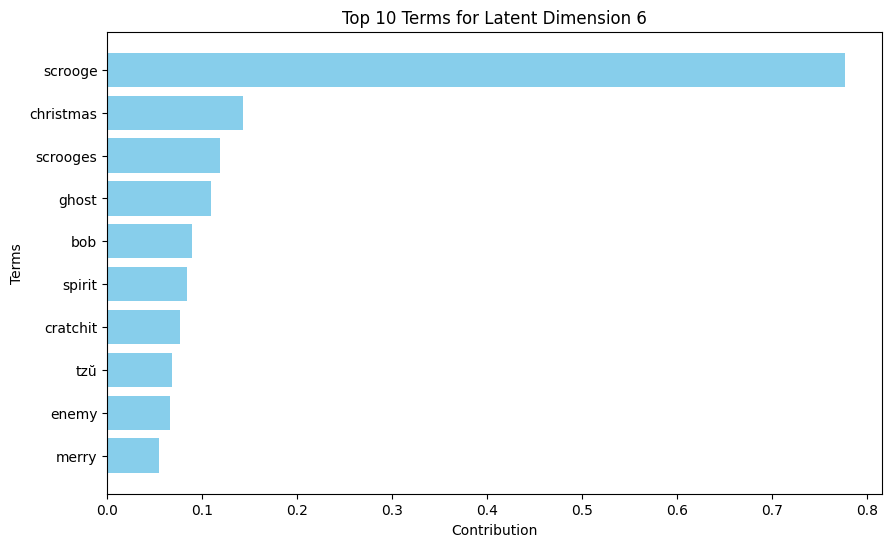

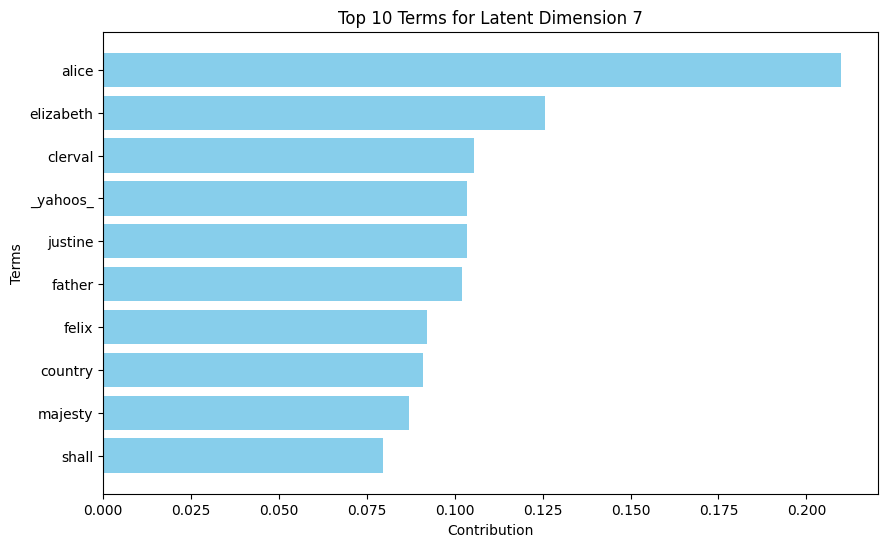

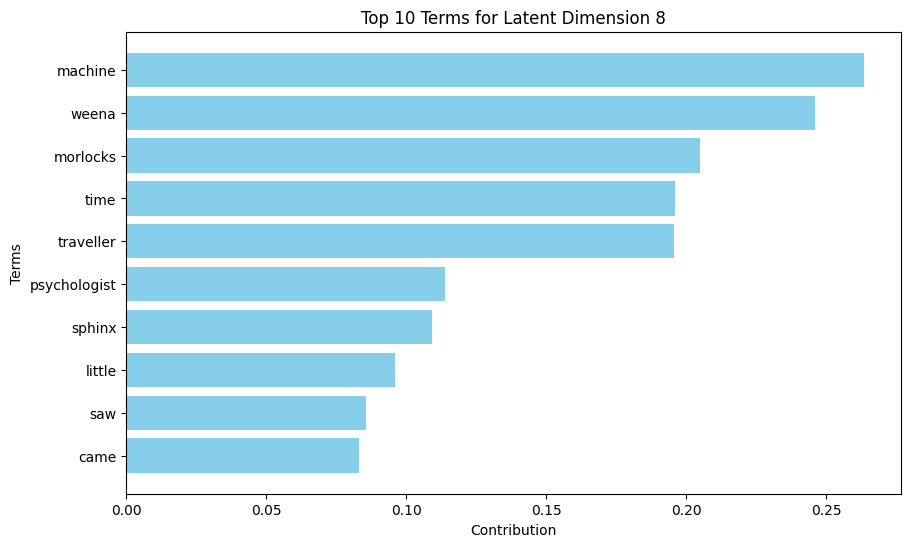

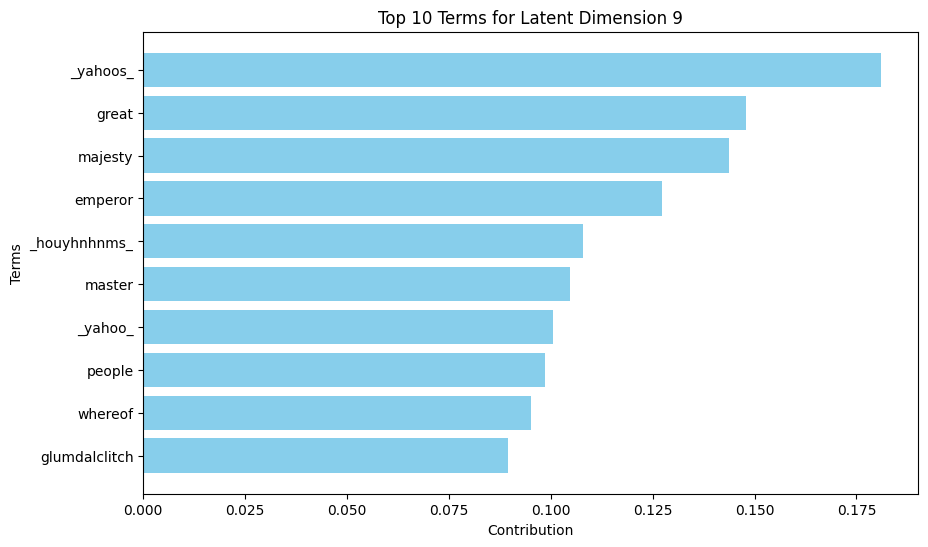

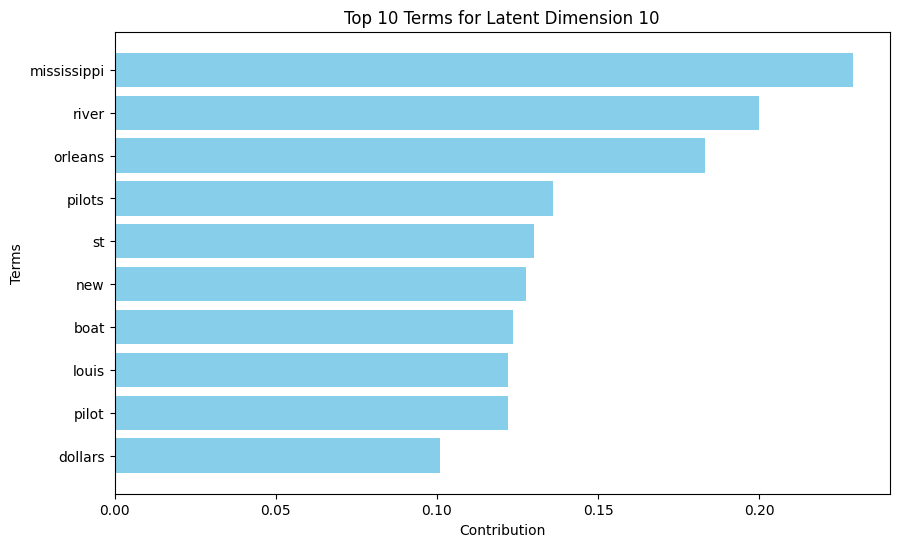

In [17]:
top_terms = 10  # Number of top terms to display per dimension
terms = tfidf_vectorizer.get_feature_names_out()

for i in range(n_components):
    sorted_indices = np.argsort(svd.components_[i])[::-1][:top_terms]
    top_contributing_terms = [terms[idx] for idx in sorted_indices]
    contributions = svd.components_[i][sorted_indices]
    
    plt.figure(figsize=(10, 6))
    plt.barh(top_contributing_terms, contributions, color='skyblue')
    plt.gca().invert_yaxis()
    plt.title(f"Top {top_terms} Terms for Latent Dimension {i+1}")
    plt.xlabel("Contribution")
    plt.ylabel("Terms")
    plt.show()


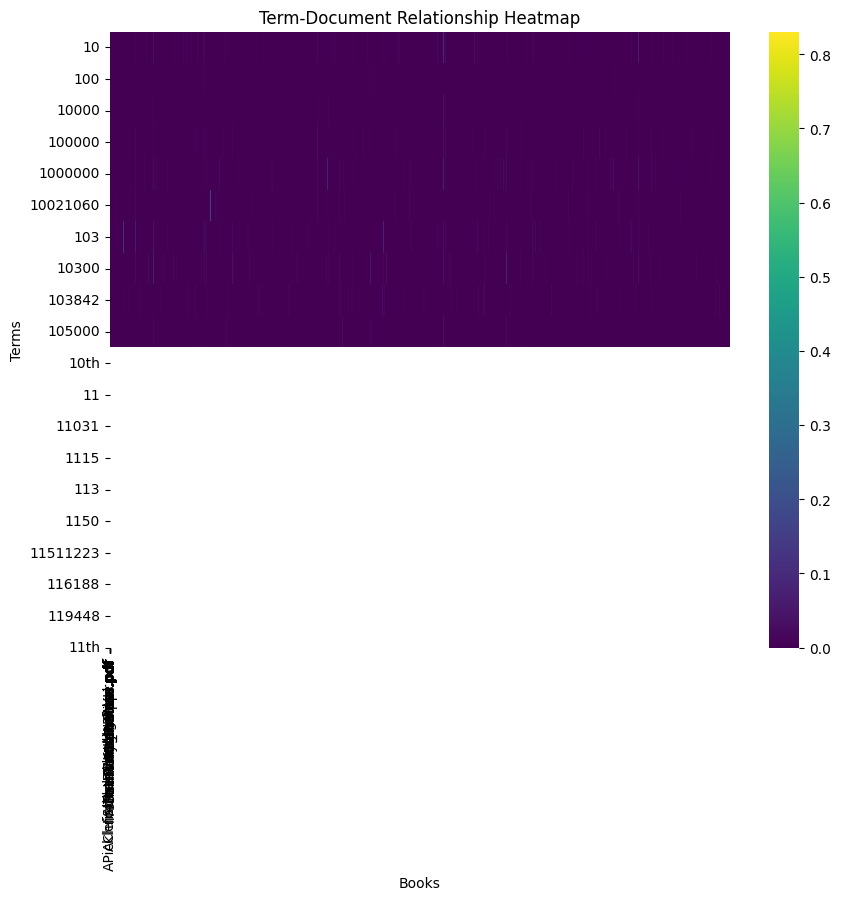

In [18]:
doc_term_matrix = np.dot(lsa_matrix, svd.components_)

plt.figure(figsize=(10, 8))
sns.heatmap(doc_term_matrix, xticklabels=pdf_files, yticklabels=terms[:20], cmap='viridis')
plt.title("Term-Document Relationship Heatmap")
plt.xlabel("Books")
plt.ylabel("Terms")
plt.show()


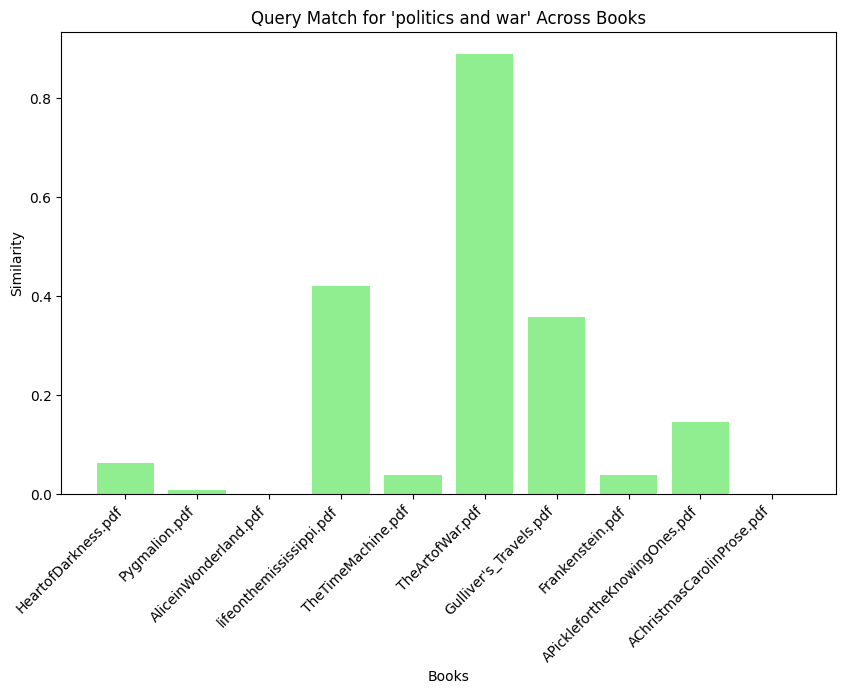

In [19]:
query = "politics and war"
query_vector = tfidf_vectorizer.transform([query])
query_lsa = svd.transform(query_vector)
query_similarity = cosine_similarity(query_lsa, lsa_matrix)

plt.figure(figsize=(10, 6))
plt.bar(pdf_files, query_similarity[0], color='lightgreen')
plt.title(f"Query Match for '{query}' Across Books")
plt.xlabel("Books")
plt.ylabel("Similarity")
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
for i in range(len(pdf_files)):
    plt.bar(range(n_components), lsa_matrix[i, :], label=pdf_files[i])
plt.title("Book Contributions to Latent Dimensions")
plt.xlabel("Latent Dimensions")
plt.ylabel("Contribution")
plt.xticks(range(n_components), [f"Dim {i+1}" for i in range(n_components)])
plt.legend()
plt.show()


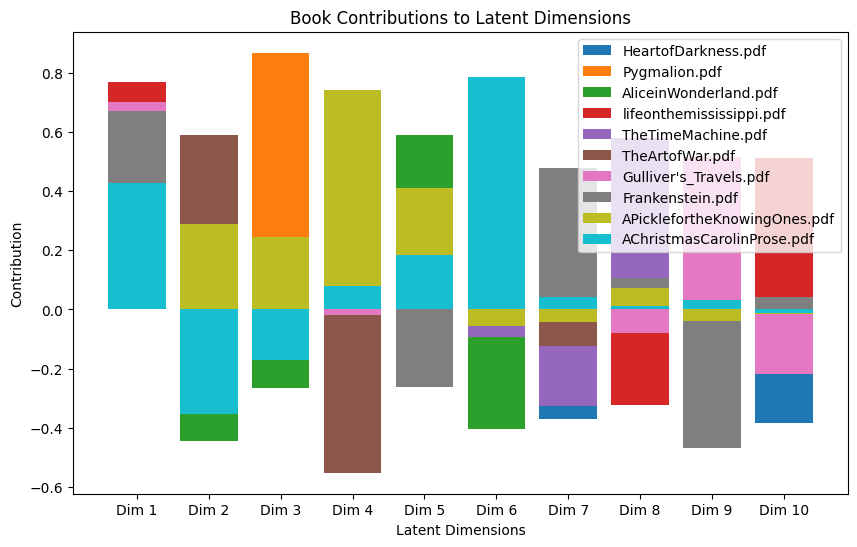

In [20]:
plt.figure(figsize=(10, 6))
for i in range(len(pdf_files)):
    plt.bar(range(n_components), lsa_matrix[i, :], label=pdf_files[i])
plt.title("Book Contributions to Latent Dimensions")
plt.xlabel("Latent Dimensions")
plt.ylabel("Contribution")
plt.xticks(range(n_components), [f"Dim {i+1}" for i in range(n_components)])
plt.legend()
plt.show()


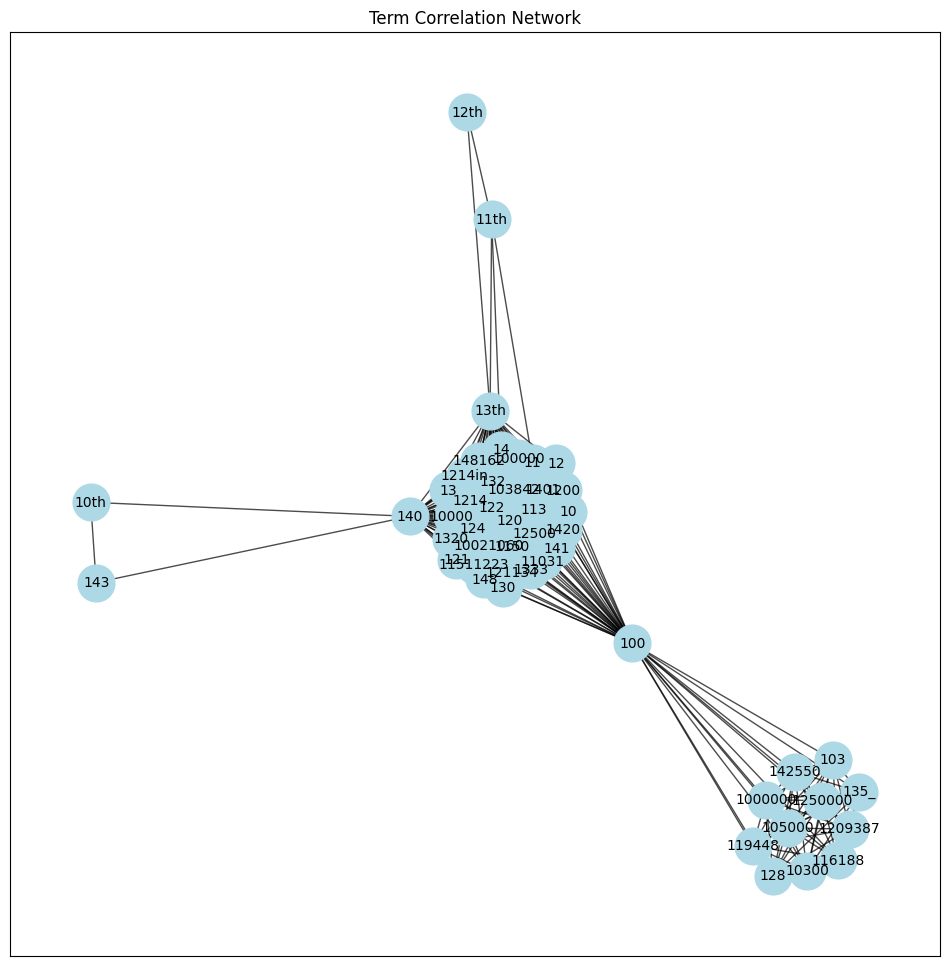

In [21]:
import networkx as nx

term_correlation_matrix = cosine_similarity(svd.components_.T)
G = nx.Graph()

threshold = 0.5  # Add edges for correlations above this threshold
for i, term1 in enumerate(terms[:50]):  # Limit to top 50 terms for clarity
    for j, term2 in enumerate(terms[:50]):
        if i != j and term_correlation_matrix[i, j] > threshold:
            G.add_edge(term1, term2, weight=term_correlation_matrix[i, j])

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title("Term Correlation Network")
plt.show()


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000023945F109A0> (for post_execute):


KeyboardInterrupt: 

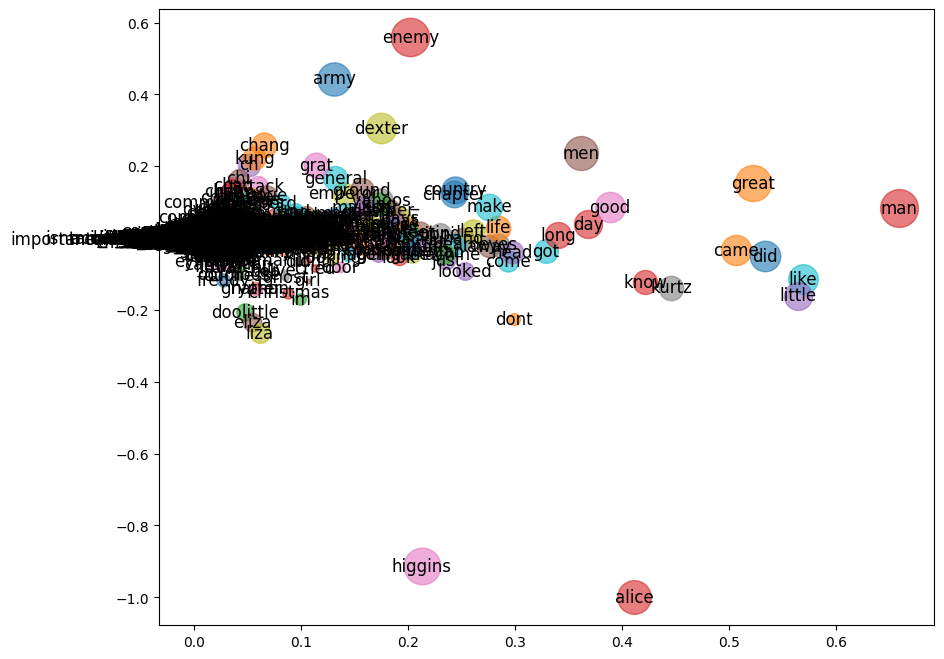

In [22]:

# Step 5: Create Word Bubble Graph
terms = tfidf_vectorizer.get_feature_names_out()
term_contributions = svd.components_.T

# Normalize contributions for visualization
normalized_contributions = term_contributions / np.max(np.abs(term_contributions), axis=0)

fig, ax = plt.subplots(figsize=(10, 8))

for i, term in enumerate(terms):
    x = normalized_contributions[i, 0]
    y = normalized_contributions[i, 1]
    size = np.abs(x + y) * 1000  # Adjust size based on contribution magnitude
    ax.scatter(x, y, s=size, alpha=0.6, label=term)
    ax.text(x, y, term, fontsize=12, ha='center', va='center')

ax.axhline(0, color='gray', linestyle='--', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='--', linewidth=0.5)
ax.set_title("Word Bubble Vector Graph (LSI)")
ax.set_xlabel("SVD Component 1")
ax.set_ylabel("SVD Component 2")
plt.grid(True)
plt.show()


In [ ]:
# pip install PyPDF2 wordcloud matplotlib nltk
#

# Generating Word cloud for each Book

In [ ]:
import PyPDF2
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Global variables
lemmatizer = WordNetLemmatizer()

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text()
    return text

# Function to preprocess text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    filtered_words = [word for word in tokens if word.isalnum() and word not in stop_words]
    return " ".join(filtered_words)

# Function to generate word cloud
def generate_word_cloud(text, output_path):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordcloud.to_file(output_path)
    print(f"Word cloud saved as {output_path}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


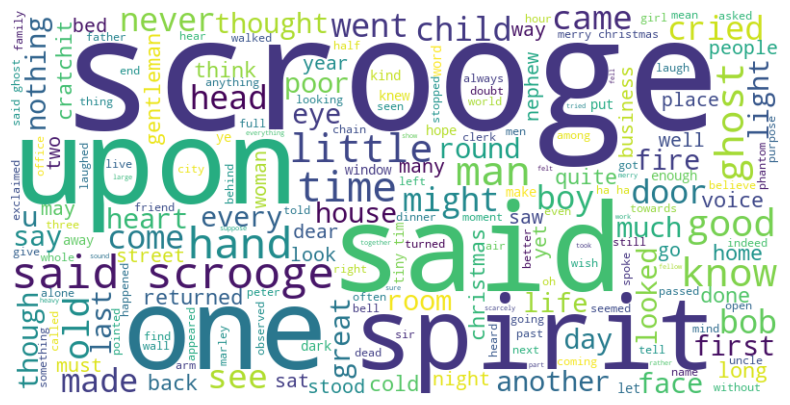

Word cloud saved as AChristmasCarolinProse_wordcloud.png


In [ ]:

# # Main script
# pdf_path = "./books/AChristmasCarolinProse.pdf"  # Replace with your PDF file path
# output_path = "AChristmasCarolinProse_wordcloud.png"  # Output path for the word cloud image

# # Extract, preprocess, and generate word cloud
# text = extract_text_from_pdf(pdf_path)
# preprocessed_text = preprocess_text(text)
# generate_word_cloud(preprocessed_text, output_path)


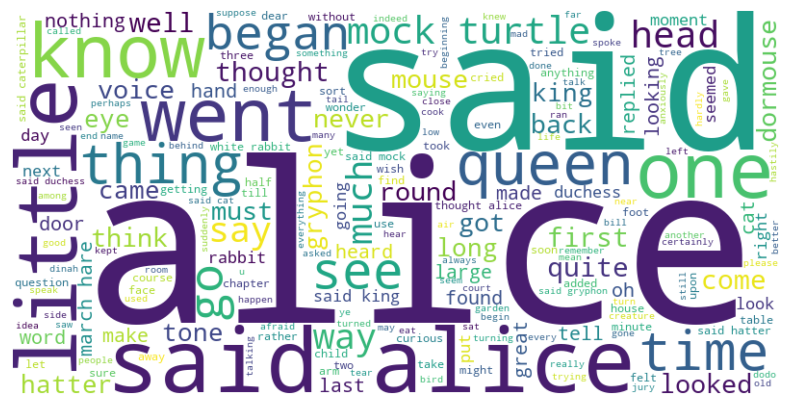

Word cloud saved as AliceinWonderland_wordcloud.png


In [ ]:

# # Main script
# pdf_path = "./books/AliceinWonderland.pdf"  # Replace with your PDF file path
# output_path = "AliceinWonderland_wordcloud.png"  # Output path for the word cloud image

# # Extract, preprocess, and generate word cloud
# text = extract_text_from_pdf(pdf_path)
# preprocessed_text = preprocess_text(text)
# generate_word_cloud(preprocessed_text, output_path)


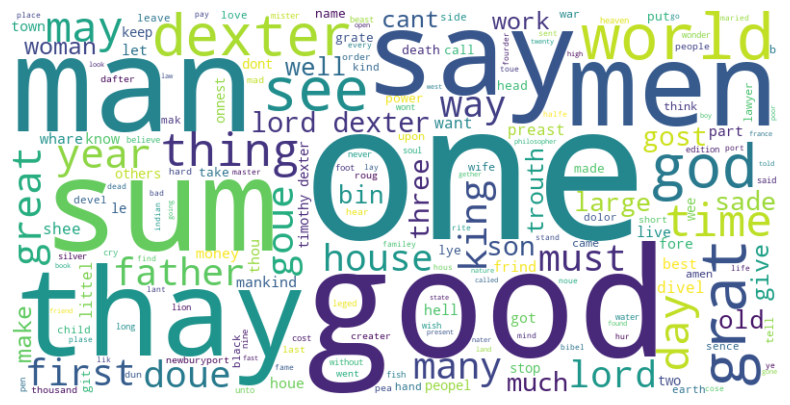

Word cloud saved as APicklefortheKnowingOnes_wordcloud.png


In [ ]:

# # Main script
# pdf_path = "./books/APicklefortheKnowingOnes.pdf"  # Replace with your PDF file path
# output_path = "APicklefortheKnowingOnes_wordcloud.png"  # Output path for the word cloud image

# # Extract, preprocess, and generate word cloud
# text = extract_text_from_pdf(pdf_path)
# preprocessed_text = preprocess_text(text)
# generate_word_cloud(preprocessed_text, output_path)


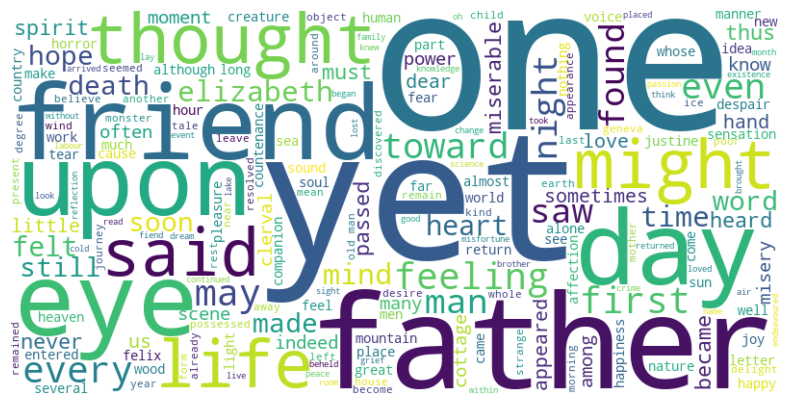

Word cloud saved as Frankenstein_wordcloud.png


In [ ]:

# # Main script
# pdf_path = "./books/Frankenstein.pdf"  # Replace with your PDF file path
# output_path = "Frankenstein_wordcloud.png"  # Output path for the word cloud image

# # Extract, preprocess, and generate word cloud
# text = extract_text_from_pdf(pdf_path)
# preprocessed_text = preprocess_text(text)
# generate_word_cloud(preprocessed_text, output_path)


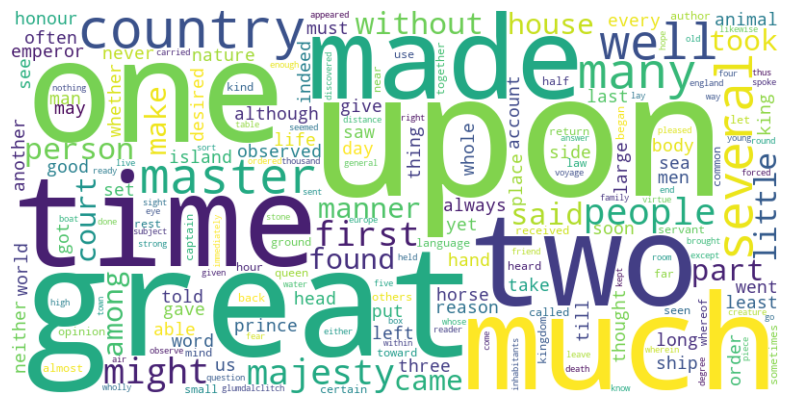

Word cloud saved as Gulliver's_Travels_wordcloud.png


In [ ]:

# # Main script
# pdf_path = "./books/Gulliver's_Travels.pdf"  # Replace with your PDF file path
# output_path = "Gulliver's_Travels_wordcloud.png"  # Output path for the word cloud image

# # Extract, preprocess, and generate word cloud
# text = extract_text_from_pdf(pdf_path)
# preprocessed_text = preprocess_text(text)
# generate_word_cloud(preprocessed_text, output_path)


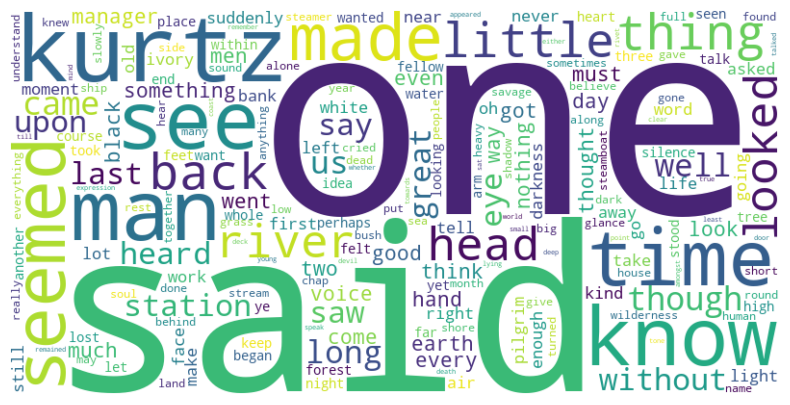

Word cloud saved as HeartofDarkness_wordcloud.png


In [ ]:

# # Main script
# pdf_path = "./books/HeartofDarkness.pdf"  # Replace with your PDF file path
# output_path = "HeartofDarkness_wordcloud.png"  # Output path for the word cloud image

# # Extract, preprocess, and generate word cloud
# text = extract_text_from_pdf(pdf_path)
# preprocessed_text = preprocess_text(text)
# generate_word_cloud(preprocessed_text, output_path)


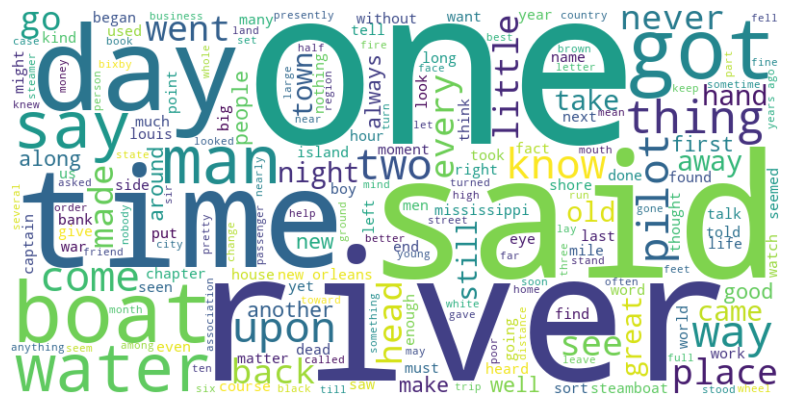

Word cloud saved as lifeonthemississippi_wordcloud.png


In [ ]:

# # Main script
# pdf_path = "./books/lifeonthemississippi.pdf"  # Replace with your PDF file path
# output_path = "lifeonthemississippi_wordcloud.png"  # Output path for the word cloud image

# # Extract, preprocess, and generate word cloud
# text = extract_text_from_pdf(pdf_path)
# preprocessed_text = preprocess_text(text)
# generate_word_cloud(preprocessed_text, output_path)


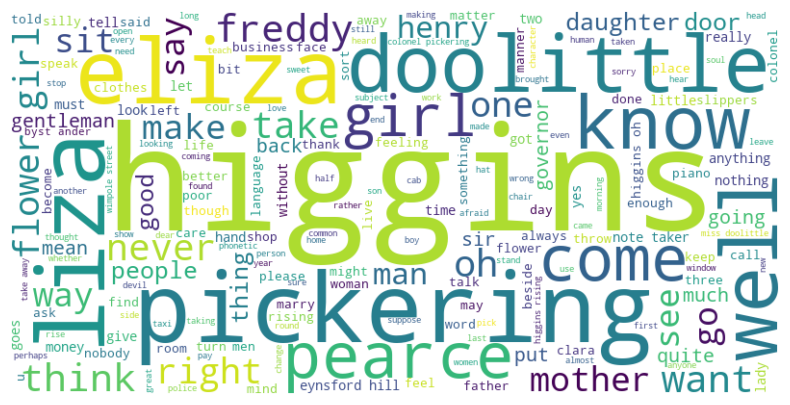

Word cloud saved as Pygmalion_wordcloud.png


In [ ]:

# # Main script
# pdf_path = "./books/Pygmalion.pdf"  # Replace with your PDF file path
# output_path = "Pygmalion_wordcloud.png"  # Output path for the word cloud image

# # Extract, preprocess, and generate word cloud
# text = extract_text_from_pdf(pdf_path)
# preprocessed_text = preprocess_text(text)
# generate_word_cloud(preprocessed_text, output_path)


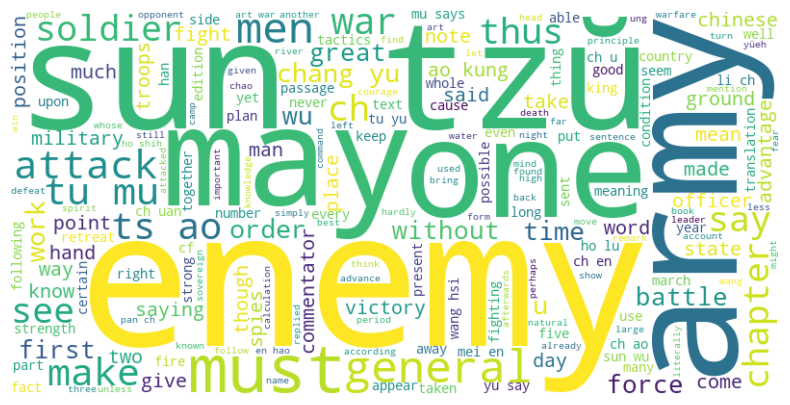

Word cloud saved as TheArtofWar_wordcloud.png


In [ ]:

# # Main script
# pdf_path = "./books/TheArtofWar.pdf"  # Replace with your PDF file path
# output_path = "TheArtofWar_wordcloud.png"  # Output path for the word cloud image

# # Extract, preprocess, and generate word cloud
# text = extract_text_from_pdf(pdf_path)
# preprocessed_text = preprocess_text(text)
# generate_word_cloud(preprocessed_text, output_path)


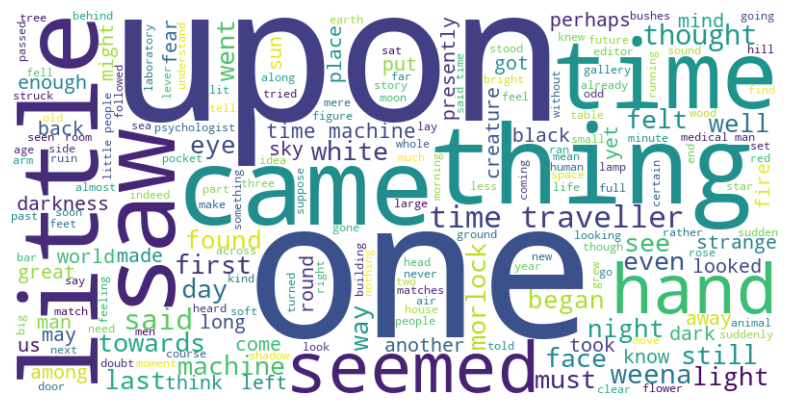

Word cloud saved as TheTimeMachine_wordcloud.png


In [ ]:

# # Main script
# pdf_path = "./books/TheTimeMachine.pdf"  # Replace with your PDF file path
# output_path = "TheTimeMachine_wordcloud.png"  # Output path for the word cloud image

# # Extract, preprocess, and generate word cloud
# text = extract_text_from_pdf(pdf_path)
# preprocessed_text = preprocess_text(text)
# generate_word_cloud(preprocessed_text, output_path)


# Cosine similarity scores between books

In [ ]:
import os
from PyPDF2 import PdfReader

# Function to load books from a directory
def load_books_from_directory(directory_path):
    books = {}
    for file_name in os.listdir(directory_path):
        # Check if the file is a PDF file
        if file_name.endswith('.pdf'):
            book_name = os.path.splitext(file_name)[0]  # Extract book name (without .pdf)
            file_path = os.path.join(directory_path, file_name)
            # Read the content of the book
            reader = PdfReader(file_path)
            content = ""
            for page in reader.pages:
                content += page.extract_text() + " "
            books[book_name] = content
    return books

# Specify the path to the books directory
books_directory = './books/'

# Load the books into a dictionary
books = load_books_from_directory(books_directory)

# Print the keys (book names) to verify
print(f"Loaded books: {list(books.keys())}")


Loaded books: ['AChristmasCarolinProse', 'AliceinWonderland', 'APicklefortheKnowingOnes', 'Frankenstein', "Gulliver's_Travels", 'HeartofDarkness', 'lifeonthemississippi', 'Pygmalion', 'TheArtofWar', 'TheTimeMachine']


In [ ]:
# pip install ace_tools

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Function to preprocess text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    filtered_words = [word for word in tokens if word.isalnum() and word not in stop_words]
    return " ".join(filtered_words)

# Preprocess each book's text
preprocessed_books = {title: preprocess_text(text) for title, text in books.items()}

# Convert texts to TF-IDF vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_books.values())

# Compute cosine similarity matrix
cosine_sim_matrix = cosine_similarity(tfidf_matrix)

# Create a DataFrame for better visualization
cosine_sim_df = pd.DataFrame(
    cosine_sim_matrix,
    index=preprocessed_books.keys(),
    columns=preprocessed_books.keys()
)

# Optionally, save the matrix to a CSV file
cosine_sim_df.to_csv("cosine_similarity_scores.csv")


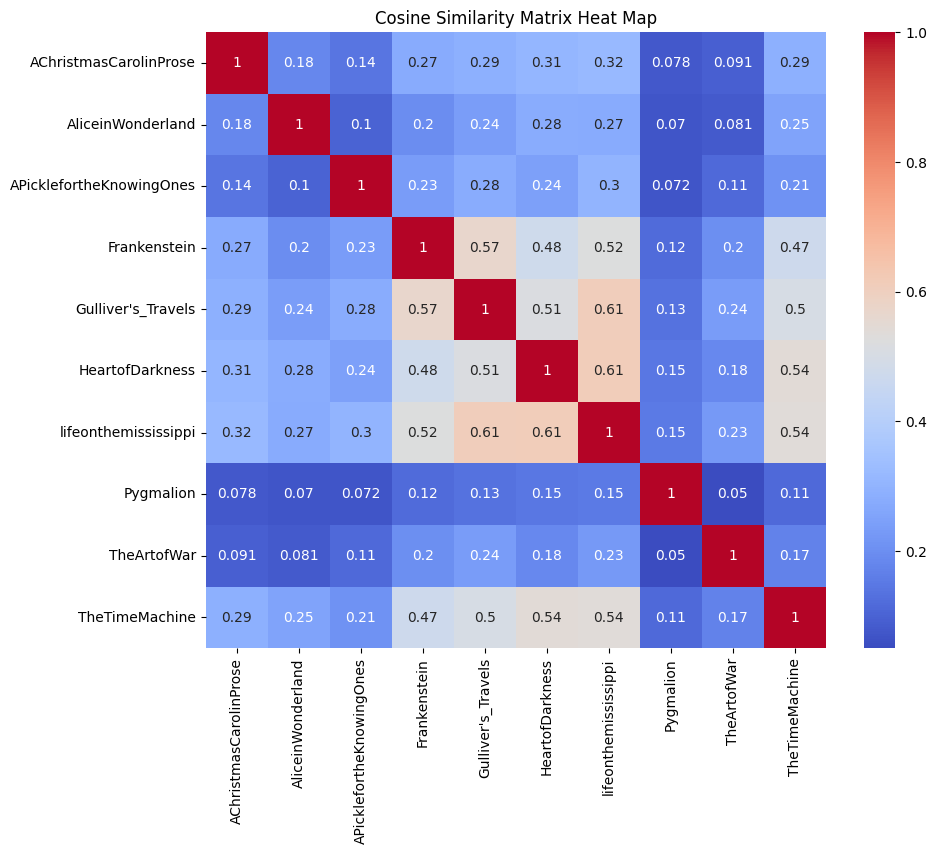

In [ ]:
import seaborn as sns

# Plot the heat map for the similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_matrix, annot=True, cmap='coolwarm', xticklabels=books.keys(), yticklabels=books.keys())
plt.title('Cosine Similarity Matrix Heat Map')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd


# Convert book texts to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(books.values())

# Perform Latent Semantic Analysis (LSA)
n_components = 50  # Number of latent dimensions
lsa = TruncatedSVD(n_components=n_components, random_state=42)
lsa_matrix = lsa.fit_transform(tfidf_matrix)

# Compute cosine similarity in latent semantic space
cosine_sim_matrix = cosine_similarity(lsa_matrix)

# Create a DataFrame for better visualization
cosine_sim_df = pd.DataFrame(
    cosine_sim_matrix,
    index=books.keys(),
    columns=books.keys()
)
# Optionally, save the matrix to a CSV file
cosine_sim_df.to_csv("book_similarity_latent_space.csv")


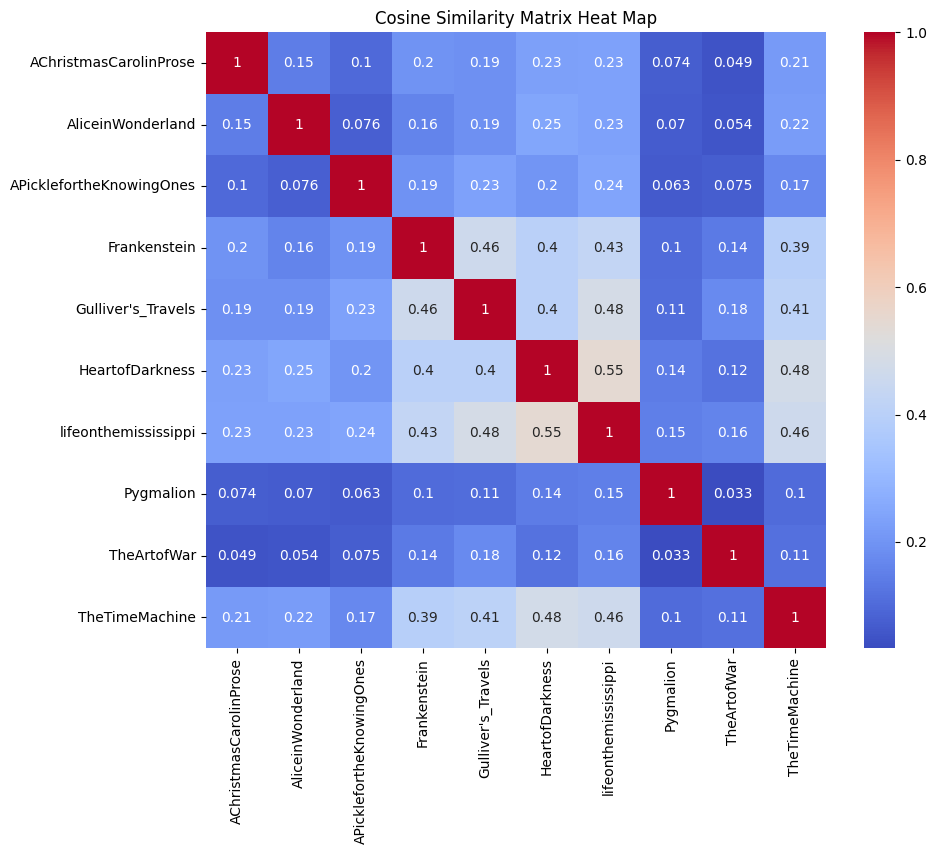

In [ ]:

# Plot the heat map for the similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_matrix, annot=True, cmap='coolwarm', xticklabels=books.keys(), yticklabels=books.keys())
plt.title('Cosine Similarity Matrix Heat Map')
plt.show()